In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

import statsmodels.formula.api as smf
import lmdiag

In [3]:
carseats = pd.read_csv('data/Carseats.csv', index_col=0)
carseats.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
1   9.50        138      73           11         276    120       Bad   42   
2  11.22        111      48           16         260     83      Good   65   
3  10.06        113      35           10         269     80    Medium   59   
4   7.40        117     100            4         466     97    Medium   55   
5   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
1         17   Yes  Yes  
2         10   Yes  Yes  
3         12   Yes  Yes  
4         14   Yes  Yes  
5         13   Yes   No

In [4]:
carseats.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 57.5+ KB


&lt;Figure size 864x864 with 0 Axes&gt;

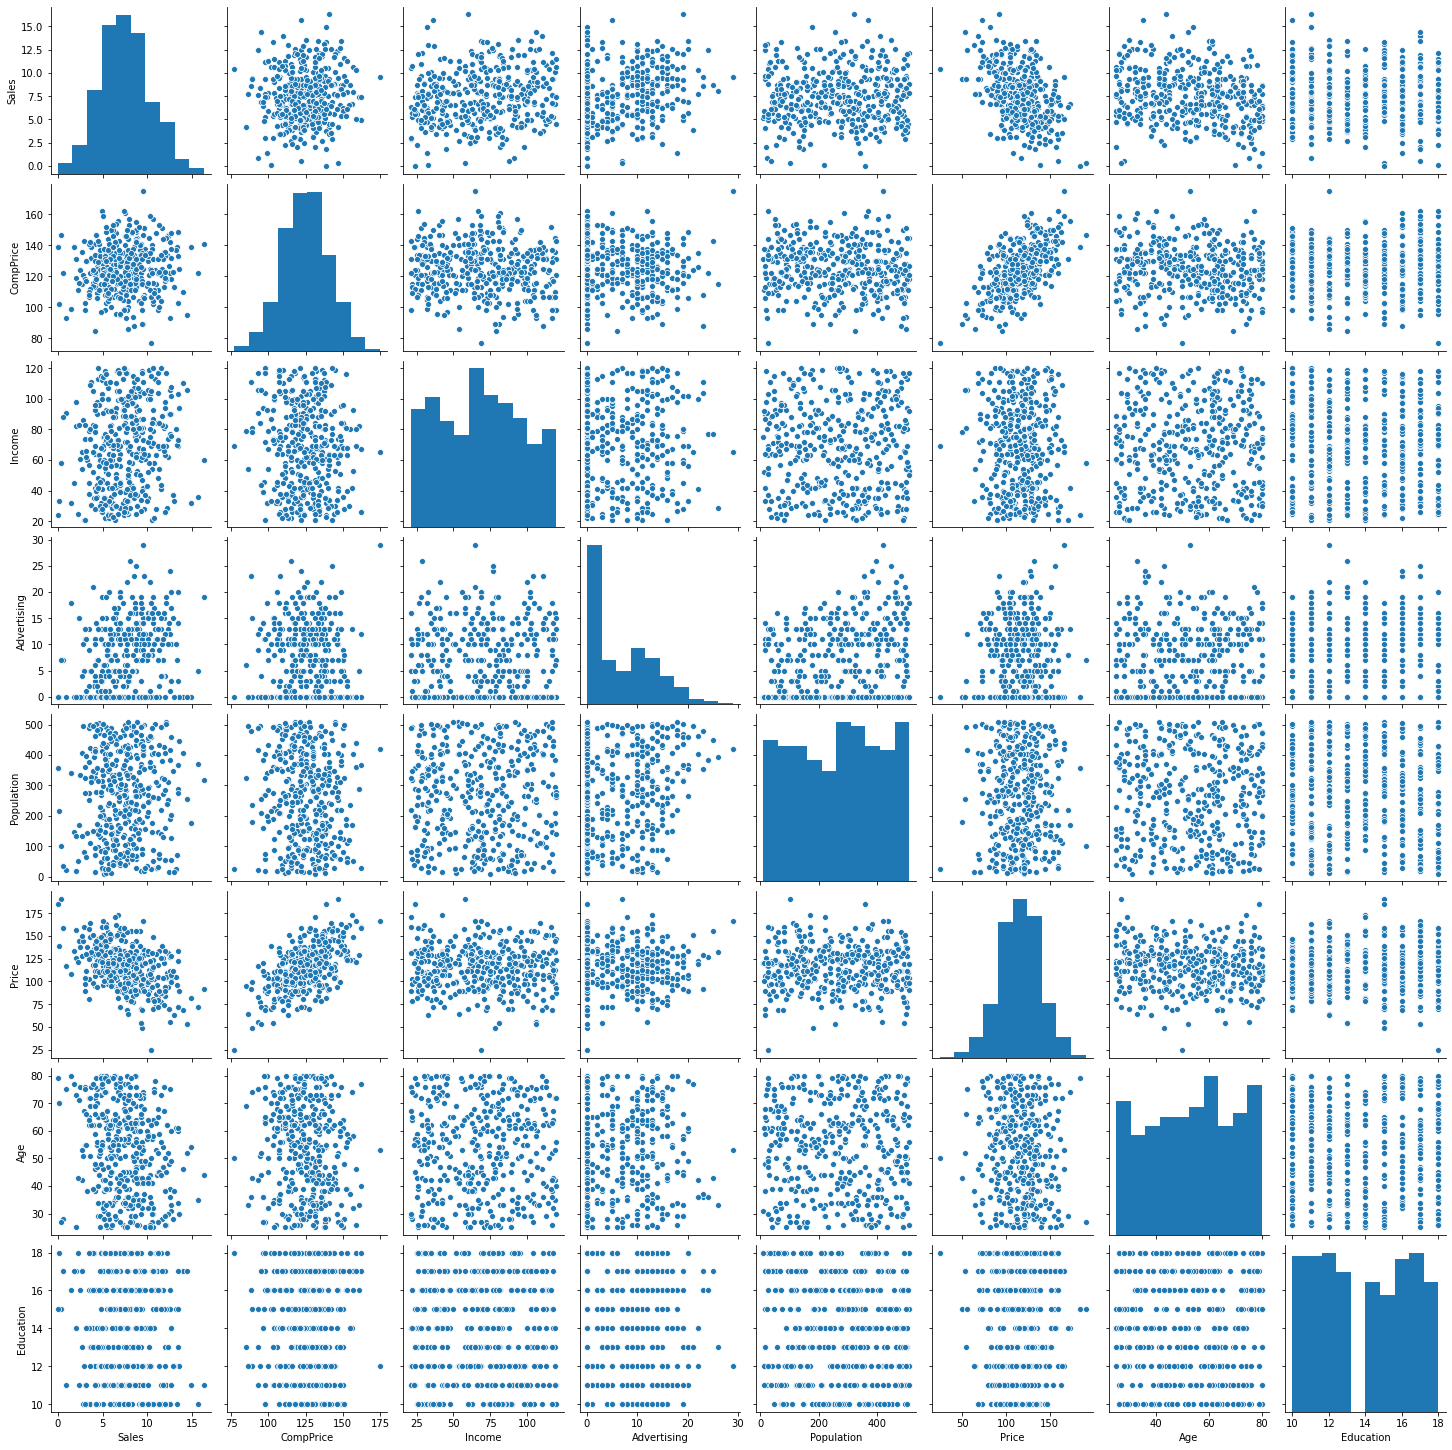

In [7]:
plt.figure(figsize=(12,12))
sb.pairplot(carseats)
plt.show()

In [6]:
# Regression model Sales ~ Price + Urban + US
lm = smf.ols(formula='Sales ~ 1 + Price + C(Urban) + C(US)', data=carseats).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sat, 03 Oct 2020   Prob (F-statistic):           2.39e-23
Time:                        11:26:10   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P&gt;|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.0435      0.651  

In [11]:
lm2 = smf.ols(formula='Sales ~ 1 + Price + US', data=carseats).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sat, 03 Oct 2020   Prob (F-statistic):           2.66e-24
Time:                        11:40:19   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P&gt;|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      

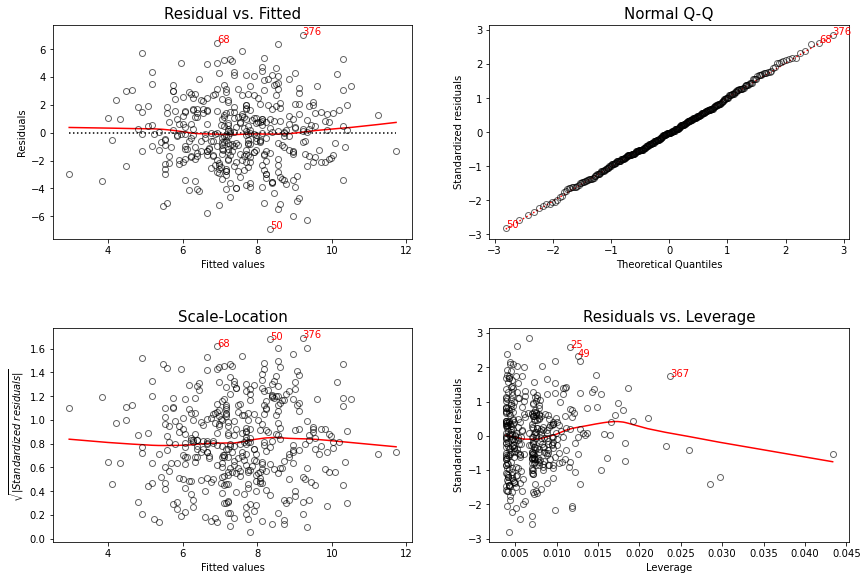

In [12]:
plt.figure(figsize=(12,8))
lmdiag.plot(lm2);

In [17]:
prediction = lm2.get_prediction()
prediction.summary_frame(alpha=0.05)

mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
1    7.693120  0.154641       7.389103       7.997137      2.828881   
2    9.708792  0.234317       9.248135      10.169450      4.832257   
3    9.872225  0.246373       9.387866      10.356585      4.993394   
4    8.946105  0.185392       8.581632       9.310578      4.077714   
5    6.057656  0.219869       5.625403       6.489909      1.183721   
..        ...       ...            ...            ...           ...   
396  7.257299  0.164501       6.933897       7.580700      2.391810   
397  7.693120  0.154641       7.389103       7.997137      2.828881   
398  5.568492  0.268934       5.039779       6.097205      0.685058   
399  9.055061  0.191435       8.678708       9.431413      4.185766   
400  7.693120  0.154641       7.389103       7.997137      2.828881   

     obs_ci_upper  
1       12.557359  
2       14.585328  
3       14.751057  
4       13.814497  
5       10.931590  
..            ...  
396     12.122788  
397     12.557359  
398     10.451926  
399     13.924356  
400     12.557359  

[400 rows x 6 columns]

In [23]:
lm2.conf_int(alpha=0.05).rename(columns={0:'min', 1:'max'})

min        max
Intercept  11.79032  14.271265
US[T.Yes]   0.69152   1.707766
Price      -0.06476  -0.044195